# 로지스틱 회귀모형
##### 지도학습

#### 반응변수가 범주형인 경우에 적용되는 회귀분석 모형이다.
이 방법은 새로운 설명변수(또는 예측변수)의 값이 주어질 때 반응변수의 각 범주(또는 집단)에 속할 확률이 얼마인지를 추정하여(예측모형), 추정확률을 기준치에 따라 분류하는 목적으로 사용될 수도 있다(분류모형).
이 때, 모형의 적합을 통해 추정된 확률을 사후확률(posterior probability)이라 부르기도 한다.

## [예제1] 예측변수가 1개인 단순 로지스틱 회귀모형

반응변수의 범주가 2개인 로지스틱 회귀를 적용하기 위해 iris 자료의 일부분만 이용한다.
Species가 setosa와 versicolor인 100개의 자료만을 이용한다.

In [2]:
data(iris)
a <- subset(iris, Species == "setosa" | Species == "versicolor")
a$Species <- factor(a$Species)
str(a)

'data.frame':	100 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 2 levels "setosa","versicolor": 1 1 1 1 1 1 1 1 1 1 ...


glm() 함수를 이용하여 로지스틱 회귀모형을 수행한다. 이 때 family=binomial 옵션을 사용한다.

In [3]:
b <- glm(Species~Sepal.Length, data=a, family=binomial)
summary(b)


Call:
glm(formula = Species ~ Sepal.Length, family = binomial, data = a)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.05501  -0.47395  -0.02829   0.39788   2.32915  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -27.831      5.434  -5.122 3.02e-07 ***
Sepal.Length    5.140      1.007   5.107 3.28e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 138.629  on 99  degrees of freedom
Residual deviance:  64.211  on 98  degrees of freedom
AIC: 68.211

Number of Fisher Scoring iterations: 6


회귀계수의 검정에서 p-값이 3.28e-07이므로 Sepal.Length가 매우 유의한 변수이며, Sepal.Length가 한 단위 증가함에 따라 versicolor(Y=2)일 오즈가 exp(5.140) 170배 증가함을 알 수 있다.

위 결과의 마지막 부분에 제시된 Null deviance는 절편만 포함하는 모형의 완전모형(포화모형)으로부터의 이탈도(deviance)를 나타내며 통계적으로 유의하므로 적합결여를 나타낸다.

In [4]:
coef(b)

(Intercept) Sepal.Length 
  -27.831451     5.140336

In [5]:
exp(coef(b)["Sepal.Length"])

Sepal.Length 
    170.7732

회귀계수 베타와 오즈의 증가량 exp(베타)에 대한 신뢰구간은 다음과 같다.

In [6]:
confint(b, parm = "Sepal.Length")

Waiting for profiling to be done...


2.5 %   97.5 % 
3.421613 7.415508

In [7]:
exp(confint(b, parm = "Sepal.Length"))

Waiting for profiling to be done...


2.5 %     97.5 % 
  30.61878 1661.55385

fitted() 함수를 통해 적합 결과를 확인할 수 있다.

In [8]:
fitted(b)[c(1:5, 96:100)]

1          2          3          4          5         96         97 
0.16579367 0.06637193 0.02479825 0.01498061 0.10623680 0.81282396 0.81282396 
        98         99        100 
0.98268360 0.16579367 0.81282396

predict() 함수를 이용하여 새로운 자료에 대한 예측을 수행한다.

In [9]:
predict(b, newdata=a[c(1, 50, 51, 100), ], type="response")

1        50        51       100 
0.1657937 0.1062368 0.9997116 0.8128240

cdplot() 함수는 Sepal.Length(연속형 변수)의 변화에 따른 범주형 변수의 조건부 분포를 보여준다.
아래의 그림은 Sepal.Length가 커짐에 따라 versicolor의 확률이 증가함을 보여준다.
이 함수는 로지스틱 회귀의 탐색적 분석에 유용하다.

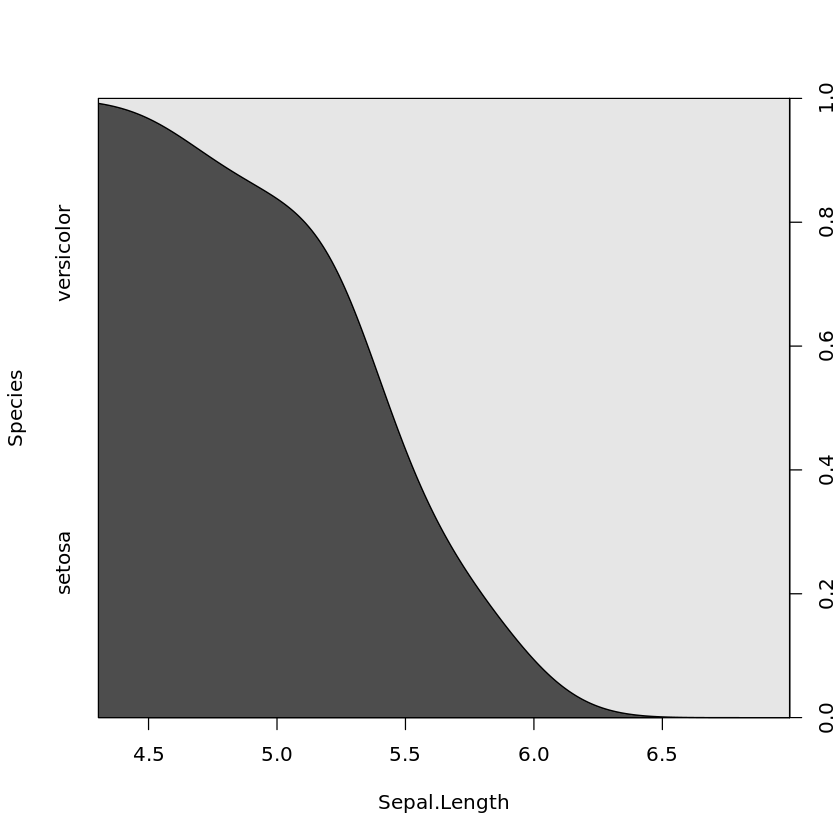

In [10]:
cdplot(Species~Sepal.Length, data=a)

적합된 로지스틱회귀모형의 그래프는 다음과 같다.

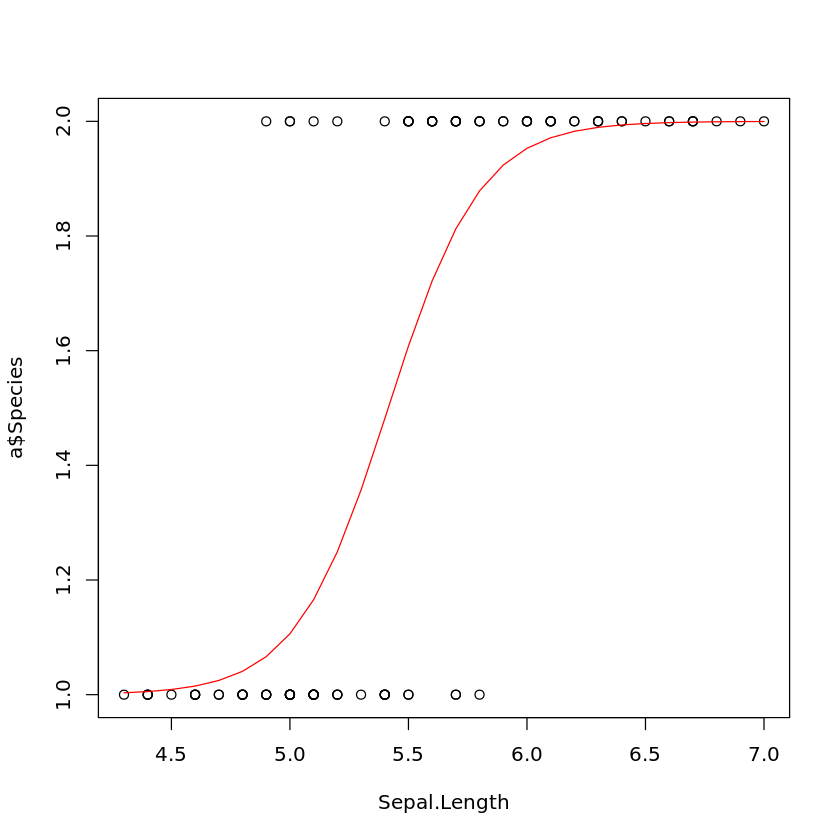

In [12]:
plot(a$Sepal.Length, a$Species, xlab="Sepal.Length")
x=seq(min(a$Sepal.Length), max(a$Sepal.Length), 0.1)
lines(x, 1+(1/(1+(1/exp(-27.831+5.140*x)))), type="l", col="red")

## [예제2] 1973~1974년도에 생산된 32종류의 자동차에 대해 11개 변수값을 측정

In [1]:
attach(mtcars)
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


이항 변수 vs(0:flat engine, 1:straight engine)를 반응변수로, mpg(miles/gallon)와 am(Transmission:0=automatic, 1:manual)을 예측변수로 하는 로지스틱 회귀모형을 이용하면 다음과 같다.

##### 다중로지스틱 회귀분석
아래의 glm() 함수의 적용시 family=binomial은 family=binomial(logit)과 동일하다.

In [2]:
glm.vs <- glm(vs~mpg+am, data=mtcars, family=binomial)
summary(glm.vs)


Call:
glm(formula = vs ~ mpg + am, family = binomial, data = mtcars)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.05888  -0.44544  -0.08765   0.33335   1.68405  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -12.7051     4.6252  -2.747  0.00602 **
mpg           0.6809     0.2524   2.698  0.00697 **
am           -3.0073     1.5995  -1.880  0.06009 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.860  on 31  degrees of freedom
Residual deviance: 20.646  on 29  degrees of freedom
AIC: 26.646

Number of Fisher Scoring iterations: 6


다른 모든 변수들(여기서는am)이 주어질 때, mpg값이 한단위 증가함에 따라 vs가 1일 오즈가 exp(0.689), 1.98배(즉, 98%) 증가한다.
마찬가지로, mpg가 주어질 때, 오즈에 대한 am의 효과는 emp(-3.0073), 0.05배 즉, 변속기가 수동인 경우 자동에 비해 vs=1의 오즈가 95%나 감소한다.

예측변수가 여러개인 모형의 적합시 변수선택법을 적용하기 위해서는 direction= 옵션을 사용한다.

direction= 옵션에는 "both", "backward", "forward"가 있으며, 디폴트는 "backward"가 적용된다.

In [4]:
step.vs <- step(glm.vs, direction="backward")

Start:  AIC=26.65
vs ~ mpg + am

       Df Deviance    AIC
<none>      20.646 26.646
- am    1   25.533 29.533
- mpg   1   42.953 46.953


아래의 summary() 함수를 수행한 결과는 위의 summary(glm.vs)의 결과와 동일하다.

In [5]:
summary(step.vs)


Call:
glm(formula = vs ~ mpg + am, family = binomial, data = mtcars)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.05888  -0.44544  -0.08765   0.33335   1.68405  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -12.7051     4.6252  -2.747  0.00602 **
mpg           0.6809     0.2524   2.698  0.00697 **
am           -3.0073     1.5995  -1.880  0.06009 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.860  on 31  degrees of freedom
Residual deviance: 20.646  on 29  degrees of freedom
AIC: 26.646

Number of Fisher Scoring iterations: 6


glm() 함수의 수행결과는 많은 유용한 결과를 제공한다.
glm.vs$coef, glm.vs$fitted, glm.vs$resid, glm.vs$effects 등이 있으며 ls(), str() 함수를 통해 확인할 수 있다.

In [6]:
ls(glm.vs)
str(glm.vs)

[1] "aic"               "boundary"          "call"             
 [4] "coefficients"      "contrasts"         "control"          
 [7] "converged"         "data"              "deviance"         
[10] "df.null"           "df.residual"       "effects"          
[13] "family"            "fitted.values"     "formula"          
[16] "iter"              "linear.predictors" "method"           
[19] "model"             "null.deviance"     "offset"           
[22] "prior.weights"     "qr"                "R"                
[25] "rank"              "residuals"         "terms"            
[28] "weights"           "xlevels"           "y"

List of 30
 $ coefficients     : Named num [1:3] -12.705 0.681 -3.007
  ..- attr(*, "names")= chr [1:3] "(Intercept)" "mpg" "am"
 $ residuals        : Named num [1:32] -1.24 -1.24 2.21 1.15 -2.03 ...
  ..- attr(*, "names")= chr [1:32] "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ fitted.values    : Named num [1:32] 0.196 0.196 0.453 0.866 0.507 ...
  ..- attr(*, "names")= chr [1:32] "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ effects          : Named num [1:32] 0.726 -1.939 1.88 0.932 -0.658 ...
  ..- attr(*, "names")= chr [1:32] "(Intercept)" "mpg" "am" "" ...
 $ R                : num [1:3, 1:3] -1.8 0 0 -35.07 -5.29 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "(Intercept)" "mpg" "am"
  .. ..$ : chr [1:3] "(Intercept)" "mpg" "am"
 $ rank             : int 3
 $ qr               :List of 5
  ..$ qr   : num [1:32, 1:3] -1.804 0.22 0.276 0.189 0.277 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:32] "Mazda RX4" "Ma

##### 아래의 anava()함수는 모형의 적합(변수가 추가되는) 단계별로 이탈도의 감소량과 유의성 검정 결과를 제시해 준다.

In [7]:
anova(glm.vs, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,31,43.86011,NA
mpg,1,18.326774,30,25.53334,1.860736e-05
am,1,4.887042,29,20.64629,2.705900e-02


위의 결과는 절편항만 포함하는 null 모형에서 mpg와 am 변수가 차례로 모형에 추가됨에 따라 발생하는 이탈도의 감소량을 제시하며, p-값은 각각 1.860736e-05 와 2.705900e-02 이다. 그 결과 두 변수가 차례로 추가되면서 생겨나는 이탈도의 감소량이 모두 통계적으로 유의함을 나타낸다.

In [8]:
1-pchisq(18.327, 1)

[1] 1.860515e-05

In [9]:
1-pchisq(4.887, 1)

[1] 0.02705967